
<img src="Assessment Submission Form_all modules.png" alt="Assessment Submission">

**<h1 style=text-align:center;>Breast Cancer Prediction 📈</h1>**

## Problem Statement❓

<p>
The main aim of this pipeline is to create a predictive model for breast cancer diagnosis using the data from the chosen dataset. Here the focus is on how early and precise diagnosis can reducing mortality, and help the doctors in efficiently planning the treatment .The data collection process includes several patient's data, clinical test findings, past history, and treatment results. This pipeline needs to be created using data exploration, preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation so that a dependable model that is integrated into the diagnostic workflow can be created offering a safe tool to diagnose breast cancer accurately.
</p>

For this dataset I will be using recall as my primary metrics to measure the performance of the model. As our focus will be on the malignant cases in this dataset. A good recall will show that we are capturing this accurately.

#### Database Link : https://www.kaggle.com/datasets/adhyanmaji31/breast-cancer-prediction/data
#### Github Repo : https://github.com/SherinHartman1098/M606_Machine-Learning-Project

## Importing Libraries 📚

In [535]:
import pandas as pd
import numpy as np
from datetime import datetime
import sklearn.model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from matplotlib.ticker import ScalarFormatter
import sklearn.compose
import sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score,recall_score



## Importing the Dataset 💽

In [536]:
#Loading the dataset into the DataFrame

cancer_data = pd.read_csv('/Users/sherinhartman/Documents/GitHub/M606_Machine-Learning-Project/Dataset/Breast Cancer Prediction.csv')
cancer_data.drop(columns=['Sample code number'], inplace=True)
cancer_data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In the above process, the dataset of the breast cancer prediction has been been loaded to the dataframe called 'cancer_data'. The column 'sample code number'( which is treated as an ID to the rows) is dropped from the dataset as there is no significant impact of this particular column on our target label.

In [584]:
cancer_data.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

## Data Exploration (EDA) 🧭

<p>Note: For EDA and data pre-processing, the entire dataset will be taken into consideration. Once the dataset is cleaned,it will be split into training and testing data-sets in order to maintain consistency.</p>
 
<br/>
Now, lets check the shape of the dataset that is loaded to the DataFrame (cancer_data). Using cancer_data.shape, we can learn how may rows and columns does the given dataset contain.<

In [537]:
print("The size of the Data-Frame is :",cancer_data.shape)
print(" Number of rows in the dataset is :",cancer_data.shape[0])
print(" Number of columns in the dataset is :",cancer_data.shape[1])

The size of the Data-Frame is : (683, 10)
 Number of rows in the dataset is : 683
 Number of columns in the dataset is : 10


Now from cancer_data.shape, we learn that there are 683 rows, and 10 columns in our given dataset. Further, we can check the shape of the train_data and test_data. 

In [538]:
cancer_data_train, cancer_data_test=sklearn.model_selection.train_test_split(cancer_data)
print("The size of the train data set is :", cancer_data_train.shape)
print("The size of the test data set is :",cancer_data_test.shape)

The size of the train data set is : (512, 10)
The size of the test data set is : (171, 10)


From the above output, we learn that in the train data set, there are 512 rows and 10 columns. Similarly, in test data set, there are 171 rows and 10 columns. Additionally, lets check if the given dataset contains any null value or any such other characteristics.

In [539]:
nullValue_Percentage = {}
for column in cancer_data_train:
    nullValue_Percentage[column] = (( cancer_data_train[column].isnull().sum() ))
np_cancer_data = pd.DataFrame( list( nullValue_Percentage.items() ),  columns=[  'column name'  , 'null value %' ])
np_cancer_data

,column name,null value %
0,Clump Thickness,0
1,Uniformity of Cell Size,0
2,Uniformity of Cell Shape,0
3,Marginal Adhesion,0
4,Single Epithelial Cell Size,0
5,Bare Nuclei,0
6,Bland Chromatin,0
7,Normal Nucleoli,0
8,Mitoses,0
9,Class,0


<p> From the above output, we learn that there are no null values present in the given dataset. Further we can check if there any duplicates in the given dataset.</p>

In [540]:
cancer_data.duplicated().any()

True

We see that there are duplicate values in the dataset. Hence, we can use drop_duplicates() function to remove all the duplicates in the given dataset.

In [541]:
del_dupe=cancer_data.drop_duplicates()

In [542]:
del_dupe.duplicated().any()

False

<p>Now we can see that all the duplicates are removed as the output for 'del_dupe.duplicated().any()' is false. This shows that the given dataset is clean and and has no duplicates.<p></br>
<p>Next, we are inspecting the data types of each column in the cancer_data_train DataFrame. This helps to analyse and understand  the structure and nature of  data, which is fundamental for different subsequent steps such as data cleaning, feature engineering, and modeling</p>

In [543]:
cancer_data_train.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

<p>The data types of all the columns are numerical. Therefore, there are no categorical features in the given dataset.</p>

<p>Now, lets create histograms for every columns in the breast cancer prediction (cancer_data) dataset to produce a visual overview of the distribution of data across different features.</p>

<Figure size 1000x800 with 0 Axes>

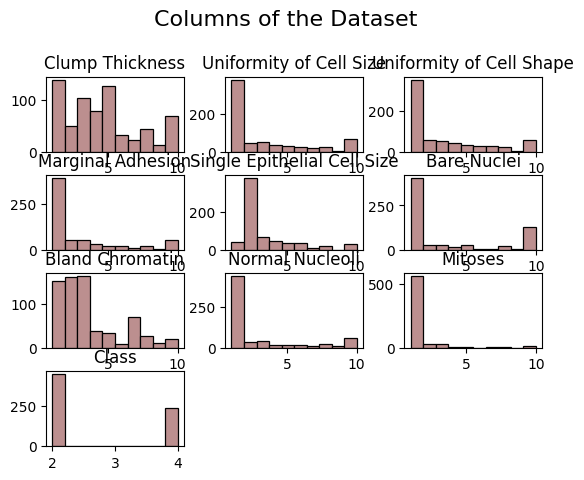

In [572]:
plt.figure(figsize=(10, 8)) 
plt.subplots_adjust(hspace=4.5, wspace=5.7)
cancer_data.hist(color='#BC8F8F', edgecolor='black', linewidth=0.9, grid=False) 
plt.suptitle('Columns of the Dataset', x=0.5, y=1.02, fontsize=16)
plt.show()

<p>now, lets plot the histogram for our target label 'Class'.</p>

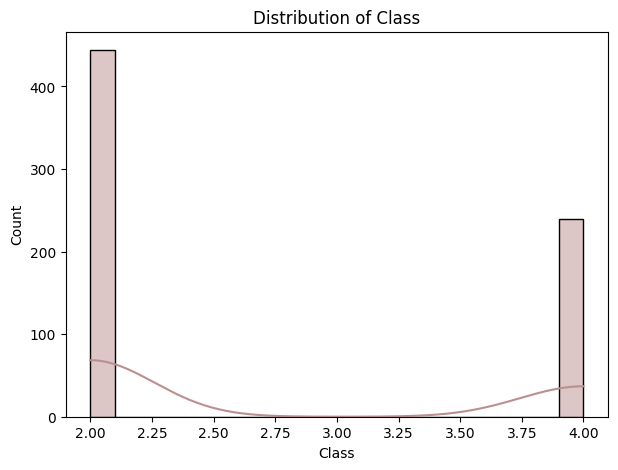

In [573]:
plt.figure(figsize=(7, 5))
sns.histplot(cancer_data['Class'], bins=20, kde=True, color='#BC8F8F')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

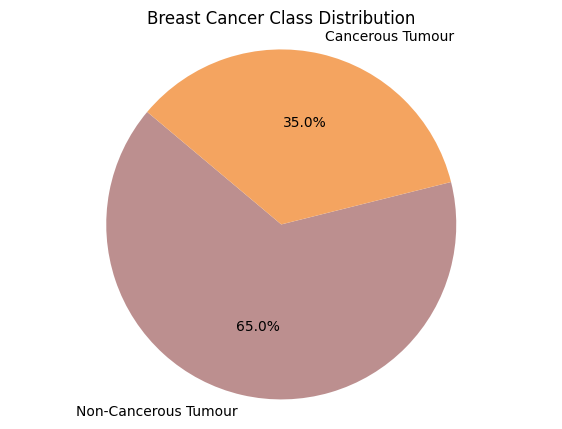

In [546]:
counts = cancer_data['Class'].value_counts()
labels = ['Non-Cancerous Tumour', 'Cancerous Tumour']
colors = ['#BC8F8F', '#F4A460']

plt.figure(figsize=(7, 5))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Breast Cancer Class Distribution')
plt.axis('equal')
plt.show()

<p>The above chart shows the ditribution of class of non-cancerous tumour(begnin)and cancerous tumour(Malignant). Where class 2(non-cancerous tumour) is 65% and class 4(Canceerous tumour) is 35%.</p>

<p>Now, lets plot a heatmap visualization of the correlation matrix for numerical features in the dataset cancer_data.</p>

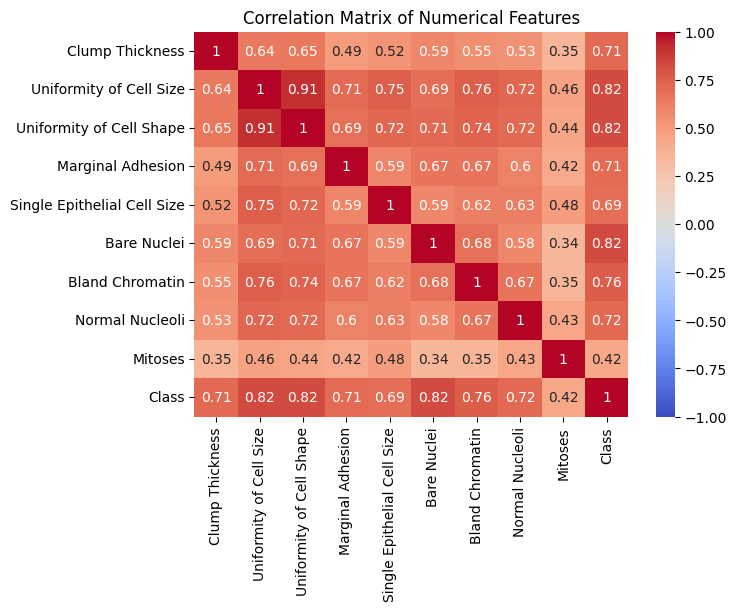

In [547]:
numerical_cancer_data = cancer_data.select_dtypes(include=['number'])
correlation_matrix = numerical_cancer_data.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


<p>The above heatmeap illustrates the correlation matrix of numerical features and the given dataset. Every cell represents the relationship from -1 to +1. The relationships are represented by 2 colors. The higher relationshps are denoted by hotter tones of red and lower relationships are denoted with cooler tones of blue. The main aim here is to depict the interdependencies between different numerical features which will inturn support the feature selection and model building.</p>

## Data-PreProcessing 🔩


In [548]:
x_train=cancer_data_train.drop(['Class'], axis=1)
y_train=cancer_data_train['Class']
x_test=cancer_data_test.drop(['Class'],axis=1)
y_test=cancer_data_test['Class']

print("Size of x_train :",x_train.shape)
print("Size of x_test :",x_test.shape)
print("Size of y_train :", y_train.shape)
print("Size of y_test :", y_test.shape)

Size of x_train : (512, 9)
Size of x_test : (171, 9)
Size of y_train : (512,)
Size of y_test : (171,)


Now, from the above output we know that there are 512 rows and 9 columns in x_train,171 rows and 9 columns in x_test, 512 target values in y_train, and 171 target values in x_test.

In [549]:
y_test.head()

64     2
644    2
6      2
530    2
3      2
Name: Class, dtype: int64

In [550]:
type(y_train)

pandas.core.series.Series

In [551]:
type(x_train)

pandas.core.frame.DataFrame

<p>Next, for the given dataset,we consider the 'Class' column as a logical choice for plotting a histogram to analyze the distribution of class to check if the data is balanced or not. </p>

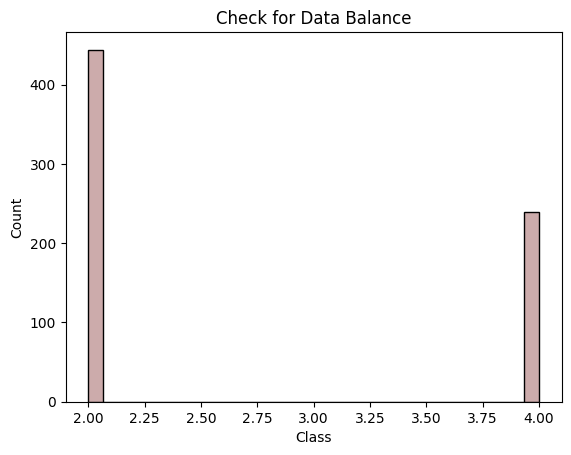

Balance Ratio: 0.61


In [574]:

class_distribution = cancer_data_train['Class'].value_counts()
class_distribution_cancer_data = pd.DataFrame({
    'Class': class_distribution.index,
    'Count': class_distribution.values
})
sns.histplot(data=cancer_data, x='Class', bins=30, color='#BC8F8F')
plt.title('Check for Data Balance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
balance_ratio = class_distribution.min() / class_distribution.max()
print(f"Balance Ratio: {balance_ratio:.2f}")

<p>From the above graph, we learn that the balance ratio for the column 'Class' which is also our target label is 0.51. This means that the data is moderatley imbalanced with the minority class having approximately 51% of the number of instances as the majority class. When we talk about balance ratio for the dataset, a ratio that is close to 1 is considered as the ideal balance ratio, indicating that the class is balanced.</p>
<p>Here's how I can proceed with handling the imbalanced data : 
Either I should over-sample the minority or under-sample the majority.</p>



In [553]:
x_train.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

<p>Now, lets consider the minority class and apply the over-sampling technique on it:</p>

In [576]:
cols=x_train.columns
smote_var = SMOTE(random_state=42)
x_train_smote_var, y_train_smote_var = smote_var.fit_resample(x_train, y_train)

x_train_smote_cd = pd.DataFrame(x_train_smote_var, columns=cols)
y_train_smote_cd = pd.Series(y_train_smote_var)

print("Balanced train size :",x_train_smote_cd.shape)
print("Balanced test size :",y_train_smote_cd.shape)

Balanced train size : (636, 9)
Balanced test size : (636,)


<p>Now, after the minority class is over-sampled, we can see that the rows in x_train_smote and y_train_smote are 636 and equal.This indicates that the classes are balanced.</p>

## Feature Engineering 👷🏻‍♀️

In [580]:
numerical_attributes_fet=x_train_smote_cd.select_dtypes(include=["int64","float64"]).columns
print("Numerical_attributes:",numerical_attributes_fet)

Numerical_attributes: Index(['std_scaler__Clump Thickness', 'std_scaler__Uniformity of Cell Size',
       'std_scaler__Uniformity of Cell Shape', 'std_scaler__Marginal Adhesion',
       'std_scaler__Single Epithelial Cell Size', 'std_scaler__Bare Nuclei',
       'std_scaler__Bland Chromatin', 'std_scaler__Normal Nucleoli',
       'std_scaler__Mitoses'],
      dtype='object')


<p>In the above snippet, numerical_attributes are the resampled training dataset (x_train_smote_cd).</p>

### Normalization 


In [581]:
std_scaler = sklearn.preprocessing.StandardScaler()

coltransfr = sklearn.compose.ColumnTransformer([('std_scaler', std_scaler,numerical_attributes_fet)],remainder='passthrough')
coltransfr.fit(x_train_smote_cd)
coltransfr.set_output( transform="pandas"  )
x_train_smote_cd=coltransfr.transform(x_train_smote_cd)
x_test=coltransfr.transform(x_test)

print("Size of x_train :",x_train_smote_cd.shape)
print("Size of x_test :",x_test.shape)



Size of x_train : (636, 9)
Size of x_test : (171, 9)


<p>In the above snippet, StandardScaler is implemented on the numerical attributes  to ensure uniformity and compatibility of numerical features (numerical_attributes) in the dataset (x_train_smote_cd). It standardizes the  numerical data and manages the transformation process using ColumnTransformer. Once the fitting and transforming is done on the the training data, it applies the same to the test data (x_test).</p>

In [557]:
y_train_smote_cd.head()

0    4
1    4
2    2
3    2
4    4
Name: Class, dtype: int64

In [558]:
y_test.head()

64     2
644    2
6      2
530    2
3      2
Name: Class, dtype: int64

## Model Selection and Hyperparameter Tuning ᠋᠋᠋᠋᠌᠋🔧

<p>For the given dataset, I will be implementing three algorithms such as:
<ul><li>Random Forest</li><li>Gradient Boosting</li><li>Support Vector Machine (SVM) </li></ul></br>
Lets check which one of the algorithm is the most appropriate and best among for the provided dataset.

#### Training the Models 🏋🏻

In [569]:
val_met_list = []


modelList = [randomForest,grdBoosting,svmClf]

for mdl in modelList:
    mdl.fit(x_train_smote_cd, y_train_smote_cd)
    y_pred = mdl.predict(x_test)
    
    val_met_list.append([
        mdl.__class__.__name__,
        recall_score(y_test, y_pred, average='weighted'),
        precision_score(y_test, y_pred, pos_label=4),
        f1_score(y_test, y_pred, pos_label=4),
        accuracy_score(y_test, y_pred)


    ])

val_met_cancer_data = pd.DataFrame(val_met_list
                        ,columns=['Model Name','RECALL','PRECISION','F1','ACC']
                        )
val_met_cancer_data = val_met_cancer_data.sort_values(
                                    ascending=False, by=['RECALL','PRECISION','F1','ACC']
                                    )
val_met_cancer_data

,Model Name,RECALL,PRECISION,F1,ACC
0,RandomForestClassifier,0.970760,0.900000,0.947368,0.970760
1,GradientBoostingClassifier,0.964912,0.897959,0.936170,0.964912
2,SVC,0.964912,0.882353,0.937500,0.964912


<p>Since our priority for the give problem statement is recall and precision, we can see that among the three models, Random Forest Classifier has the highest recall and precision being 97% and 90% respectively. Hences the best model among the three for the accurate prediction of breast cancer is Random Forest Classifier.

Let's tune the Hyper Parameters</p>


#### Hyperparameter Tuning 🏋🏻

In [583]:
randomForest= RandomForestClassifier(random_state=42)

hyper_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None], 
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=randomForest, param_grid=hyper_param, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_smote_cd, y_train_smote_cd)
best_rf_clf = grid_search.best_estimator_

y_predRF = best_rf_clf.predict(x_test)
print("Best Parameters from the hyperparameters are :", grid_search.best_params_)
print("Recall score on test set:", recall_score(y_test, y_predRF, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_predRF))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predRF))


Best Parameters from the hyperparameters are : {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Recall score on test set: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           2       0.99      0.96      0.98       126
           4       0.90      0.98      0.94        45

    accuracy                           0.96       171
   macro avg       0.94      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171


Confusion Matrix:
 [[121   5]
 [  1  44]]


<p>From the above model, we learn that the best parameters are bootstrap': True, 'max_depth': None,'max_features': None,'min_samples_leaf': 1, 'min_samples_split': 2, and 'n_estimators': 300. Here the recall score obtained is 96%. It also gives a detailed classification report where for class 2, the precision is 99%, recall is 96%, f1-score is 98%, and support is 126. Where as, for class 4, the precision obtained is 90%, recall is 98%, f1-score is 94% and support is 45. 
In the above given confusion matrix, the model was able to predict 121 correctly out of the 165 negetives. And 5 were predicted wrong. And out of 45 positives it was able to predict 44 correctly and the rest of 1 row incorrectly.
</p>

Next, the best hyper parameters are taken and trained with the final selected model.

## Final Model 🏆

In [571]:
final_ran_for_cls = RandomForestClassifier(bootstrap= True, max_depth= None, max_features= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators=300)

final_ran_for_cls.fit(x_train_smote_cd, y_train_smote_cd)

y_pred_ran_for_cls = final_ran_for_cls.predict(x_test)

print('Random Forest')
print('=' * 53)
print('RECALL   :', recall_score(y_test, y_pred, average='weighted'))
print('PRECISION     :', precision_score(y_test, y_pred_ran_for_cls, pos_label=4))  # Adjust pos_label if necessary
print('F1-SCORE      :', f1_score(y_test, y_pred_ran_for_cls, pos_label=4))  # Adjust pos_label if necessary

Random Forest
RECALL   : 0.9649122807017544
PRECISION     : 0.8979591836734694
F1-SCORE      : 0.9361702127659575


From the final model we understand that the random forest classifier has clear performed better than the others across all evaluated metrics. The high recall, precision, and F1-score values shows that the model is highly effective at classifying the target classes correctly. From the above obtained results, we can conclude that the Random Forest model is the best choice among others for the prediction of breast cancer.

## Conclusion and Discussion💡

Let's summarize how the Breast Cancer Prediction pipeline is designed to accurately classify and predict the presence of breast cancer using machine learning models. 
</br>
<p>
The pipeline created with the Breast Cancer Prediction dataset, aims to achieve primary goal to accuratley classify if the breast tumor is benign (non-cancerous) or malignant (cancerous) based on various features extracted . It essentially, aims to build models that maximize predictive accuracy. Here are some fundamental steps that are carried out in th pipeline as follows:
<ul><li>The initial and essential step is the importing required libraries and loading the dataset into the DataFrame. This process prepares the data for following preprocessing and analysis stages in the machine learning pipeline.</li>
<li>Next, the data preprocessing and feature engineering is done to handle the missing values, and normalize the numerical features alone(as there was no categoroical values existing the in the given dataset) to ensure uniformity</li>
<li>Further, Model selection and hyperparameter tuning is carried out where there are three models auch as 'Random Forest', 'Gradient Boosting', and 'Support Vector Machine' which are implemented and trained</li>
<li>following to that is evaluating the best model among the three trained models. Here, the best among the rest is evaluated based on the precision, recall, and F1-score that collectively determines the effectiveness.Then to the final model hyperpameter tuning is done with the best parmeters.</li>
<li>Finally, carryig out all the above mentioned steps, we arrive at a final model that accurately predicts the breast cancer classes illustrating rugged performance across multiple evaluation metrics, providing crucial insights for diagdiagnosis and planning the treating efficiently.</li>
</ul></p>


## Strength and Limitations ⚖️

<p>Strength :
<li>The data preprocessing is robust ensurig data quality and consistency which is essential for model performance.</li>
<li>Evaluating multiple selected and trained models gives a comprehensive and larger perspective on the best performing algorithm for the dataset.</li>
<li>Making use of various range of metrics such as precision, recall, F1-score gives a rigorous analysis of model performance.</li></p><p>
Limitations : 
<li>The intricasies of the pipeline could require critical computational resources and time, particularly for hyperparameter tuning.</li>
<li> but, with too much hyper tuning there is also a risk of overfitting where the model performs well on the training data but very poor on the test data.</li>
<li>Moreover, the accuracy of the predictions majorly depends on the complpeteness and the quality of the dataset.Any inconsistency or difference will influence the results.</li>
</p>

## Implications of the Result 📝

<p>Accurate prediction of breast cancer can help with early diagnosis and treatment, possibly saving lives and diminishing expenses while automated models smooth out the indicative interaction, permitting medical care suppliers to zero in on basic cases. Moreover, experiences from the model can support better distribution of clinical assets and arranging preventive measures.</p>

## Data Driven Recommendations 👍🏼

<p>To keep up with model accuracy and relevance,consistently update the dataset with new patient information and intermittently retrain the model to adapt to new patterns, while additionally considering extra assessment measurements like sensitivity and explicitness to catch various parts of execution. Moreover, educate healthcare professionals on interpreting model outcomes and incorporating them into clinical work processes.</p>

## Informative Features ℹ️

<li>Highlight the most predominant features such as texture, tumor size, age, etc that contribute to model predictions.</li>
<li>Make use of various tools transparent model decision explanations."</li>

## Conclusion 🎬

<p>The Breast Cancer Prediction pipeline offers a detailed approach to diagnose breast cancer with machine learning, ensuring robust performance through data quality management, model selection, and evaluation.
Ceaseless observing, updating, and refinement are critical to support the model's adequacy and dependability in practical situations.</p>